### Programska rješenja

#### YOLO
- trenutno najpopularnija i najbolja familija modela za detekciju objekata u realnom vremenu (pod najbolja se misli na novije verzije)
##### Algoritam ukratko (za originalni yolo, drugi rade na sličan način)
- Detekcija:  
1. Ulazna slika se dijeli na SxS mrežu.
2. Svaka ćelija predviđa B okvira te za svaki okvir odreduje vjerojatnost da se u njemu nalazi objekt. Nakon što svaka ćelija odredi okvire dobije se slika na kojoj su označeni objekti s vjerojatnostima, no još uvijek nije poznato kojim klasama ti objekti pripadaju (deblji obrub okvira označava veću vjerojatnost da se u okviru nalazi objekt).
3. Kako bi se moglo odrediti kojoj klasi pripadaju objekti, svaka ćelija također određuje vjerojatnost da objekt u ćeliji pripada određenoj klasi. Time se dobiva mreža s označenim klasama svake ćelije. Potrebno je napomenuti da klasa ćelije ne znači da se u njoj nalazi objekt te klase nego označava da ako se u toj ćeliji nalazi objekt onda taj objekt pripada toj klasi.
4. Spajanjem vjerojatnosti okvira i klasa dobivaju se okviri s pravom vjerojatnosti da se u njima nalazi objekt te klase. Kako bi se za svaki objekt uzeo samo jedan, najprecizniji okvir, radi se NMS (Non Max Supression).

- Treniranje:  
1. Slika se podijeli na SxS mrežu. Naravno na ulazu se dovede slika s točno označenim okvirima u kojima su objekti.
2. Zatim se klasa ćelije koja u sebi sadrži centar okvira postavi na razred objekta kojega sadržava.
3. Nakon što mreža odredi B okvira za tu ćeliju, pronađe se okvir koji se najbolje slaže s početno označenim okvirom te se njegove koordinate prilagode da se bolje slažu s koordinatama početno označenog okvira te se poveća njegova pouzdanost. Osim toga, ostalim generiranim okvirima te ćelije smanji se pouzdanost. U ćelijama gdje ne postoje početno označeni okviri, svim generiranim okvirima smanji se pouzdanost i ne prilagođavaju se koordinate i klasa ćelije.

#### Primjer rada YOLOv8

In [5]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.predict(source='0', show=True)


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
0: 480x640 (no detections), 12.0ms
0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 12.0ms
WARNING  Waiting for stream 0


WARNING  Waiting for stream 0
0: 480x640 1 cell phone, 12.0ms
0: 480x640 1 person, 1 cell phone, 13.0ms
0: 480x640 1 cell phone, 13.0ms
0: 480x640 1 toothbrush, 14.0ms
0: 480x640 1 toothbrush, 14.0ms
0: 480x640 1 laptop, 13.0ms
0: 480x640 (no detections), 13.0ms
0: 480x640 (no detections), 14.0ms
0: 480x640 1 cat, 13.0ms
0: 480x640 (no detections), 13.0ms
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 cat, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 cat, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 (no detections), 13.0ms
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 13.0ms
0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 mouse, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 15.0ms
0: 480x640 (no detections), 15.0ms
WARNING  Waitin

WARNING  Waiting for stream 0
0: 480x640 1 bed, 11.0ms
0: 480x640 1 bed, 10.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 bed, 10.0ms
0: 480x640 1 bed, 11.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
0: 480x640 1 keyboard, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 12.0ms
0: 480x640 (no detections), 13.0ms
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
0: 480x640 1 keyboard, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
0: 480x640 1 keyboard, 13.0ms
WARNING  Waitin

0: 480x640 1 person, 1 cell phone, 15.0ms
0: 480x640 1 person, 1 cell phone, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 1 cell phone, 15.0ms
0: 480x640 1 person, 1 cell phone, 16.0ms
0: 480x640 1 person, 1 cell phone, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 1 cell phone, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 1 parking meter, 15.0ms
0: 480x640 1 person, 1 parking meter, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 15.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 person, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 1 cell phone, 17.0ms
0: 480x640 1 person, 1 cell phone, 18.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 17.0ms
0: 480x640 (no detections), 18.0ms
WARNING  Waiting for stream 0
0: 480x640 1 cat, 17.0ms
0: 480x640 1 cat, 18.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 17.0ms
0: 480x640 1 person, 18.0ms
WARNING  Waiting for stream 0
0: 48

WARNING  Waiting for stream 0
0: 480x640 1 person, 13.0ms
0: 480x640 1 person, 14.0ms
0: 480x640 1 person, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 13.0ms
0: 480x640 (no detections), 15.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 13.0ms
0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
0: 480x640 1 cup, 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 person, 13.0ms
0: 480x640 1 person, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 14.0ms
0: 480x640 1 person, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 15.0ms
0: 480x640 1 person, 15.0ms
0: 480x640 1 person, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
WARNING  

0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 15.0ms
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
0: 480x640 (no detections), 15.0ms
0: 480x640 (no detections), 15.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
0: 480x640 (no detections), 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 14.0ms
0: 480x640 1 keyboard, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 cat, 1 keyboard, 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 laptop, 1 keyboard, 

WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 baseball bat, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 baseball bat, 1 skateboard, 14.0ms
0: 480x640 1 baseball bat, 1 skateboard, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 2 baseball bats, 15.0ms
0: 480x640 2 baseball bats, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 1 baseball bat, 2 knifes, 14.0ms
0: 480x640 1 baseball bat, 2 knifes, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 1 suitcase, 1 baseball bat, 1 knife, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 suitcase, 2 knifes, 15.0ms
0: 480x640 1 suitcase, 2 knifes, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 1 suitcase, 3 knifes, 15.0ms
0: 480x640 1 suitcase, 3 knifes, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 1 suitcase, 2 baseball bats, 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 2 baseball bats, 1 scissors, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 2 baseball bats, 1 scissors, 15.

0: 480x640 2 persons, 1 baseball bat, 1 scissors, 15.0ms
0: 480x640 2 persons, 1 baseball bat, 1 scissors, 15.0ms
0: 480x640 1 person, 1 baseball bat, 1 scissors, 14.0ms
0: 480x640 1 person, 1 baseball bat, 1 scissors, 16.0ms
0: 480x640 1 person, 3 scissorss, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 2 persons, 1 scissors, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 2 persons, 1 scissors, 14.0ms
0: 480x640 1 person, 2 scissorss, 1 toothbrush, 14.0ms
0: 480x640 1 person, 3 scissorss, 1 toothbrush, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 2 scissorss, 14.0ms
0: 480x640 1 person, 4 scissorss, 14.0ms
0: 480x640 4 scissorss, 14.0ms
0: 480x640 3 scissorss, 14.0ms
0: 480x640 1 person, 1 cell phone, 3 scissorss, 14.0ms
0: 480x640 1 person, 1 cell phone, 4 scissorss, 15.0ms
0: 480x640 1 person, 2 scissorss, 14.0ms
0: 480x640 1 person, 3 scissorss, 15.0ms
0: 480x640 1 person, 1 cell phone, 2 scissorss, 16.0ms
0: 480x640 2 persons, 2 scissorss, 15.0ms
0: 480x640 1 person, 1 cell 

0: 480x640 (no detections), 10.0ms
0: 480x640 (no detections), 11.0ms
0: 480x640 1 person, 1 skateboard, 11.0ms
0: 480x640 1 person, 11.0ms
0: 480x640 (no detections), 10.0ms
0: 480x640 (no detections), 10.0ms
0: 480x640 1 vase, 11.0ms
0: 480x640 1 skateboard, 10.0ms
0: 480x640 1 vase, 11.0ms
0: 480x640 1 vase, 11.0ms
0: 480x640 1 vase, 10.0ms
0: 480x640 1 vase, 11.0ms
0: 480x640 (no detections), 10.0ms
0: 480x640 (no detections), 10.0ms
0: 480x640 (no detections), 11.0ms
0: 480x640 1 person, 1 tv, 11.0ms
0: 480x640 (no detections), 10.0ms
0: 480x640 (no detections), 10.0ms
0: 480x640 1 person, 11.0ms
0: 480x640 (no detections), 10.0ms
0: 480x640 1 person, 11.0ms
0: 480x640 1 person, 1 cat, 10.0ms
0: 480x640 1 person, 2 vases, 11.0ms
0: 480x640 1 person, 1 tv, 1 vase, 10.0ms
0: 480x640 1 laptop, 11.0ms
0: 480x640 1 vase, 10.0ms
0: 480x640 1 laptop, 1 vase, 10.0ms
0: 480x640 1 person, 1 vase, 11.0ms
0: 480x640 2 persons, 10.0ms
0: 480x640 1 person, 10.0ms
0: 480x640 1 person, 2 vases, 1

WARNING  Waiting for stream 0
0: 480x640 1 person, 13.0ms
0: 480x640 1 person, 13.0ms
0: 480x640 1 person, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 13.0ms
0: 480x640 1 person, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 1 stop sign, 13.0ms
0: 480x640 1 stop sign, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 stop sign, 14.0ms
0: 480x640 1 stop sign, 14.0ms
0: 480x640 1 stop sign, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 stop sign, 12.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 stop sign, 1 baseball bat, 13.0ms
0: 480x640 1 stop sign, 1 baseball bat, 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 13.0ms
0: 480x640 1 person, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 stop sign, 13.0ms
0: 480x640 1 stop sign, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 person, 1 stop sign, 13.0ms
0: 480x640 1 person, 1 stop sign, 14.0ms
0: 480x640 1 person, 1 stop sign, 14.0ms
WARNING  Waiting for stream 0
0: 480x64

0: 480x640 2 persons, 1 remote, 12.0ms
0: 480x640 2 persons, 1 remote, 13.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 (no detections), 12.0ms
0: 480x640 (no detections), 13.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 13.0ms
0: 480x640 1 keyboard, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 keyboard, 12.0ms
0: 480x640 1 keyboard, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 1 tv, 1 mouse, 1 keyboard, 12.0ms
WARNING  Waiting for stream 0
0: 480x640 1 tv, 1 mouse, 1 keyboard, 12.0ms
0: 480x640 1 tv, 1 mouse, 1 keyboard, 14.0ms
0: 480x640 1 tv, 1 mouse, 1 keyboard, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 tv, 1 mouse, 1 keyboard, 13.0ms
WARNING  Waiting for stream 0
0: 480x640 1 tv, 1 mouse, 13.0ms
0: 480x640 1 tv, 1 mouse, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 tv, 1 mouse, 1 keyboard, 13.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 tv, 1 keyboard, 1 cell phone, 13.0ms
0: 480x640 1 tv,

WARNING  Waiting for stream 0
0: 480x640 1 tv, 2 keyboards, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 1 laptop, 15.0ms
0: 480x640 1 laptop, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 15.0ms
0: 480x640 (no detections), 15.0ms
WARNING  Waiting for stream 0
0: 480x640 1 book, 14.0ms
0: 480x640 1 book, 16.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 15.0ms
0: 480x640 (no detections), 16.0ms
0: 480x640 (no detections), 16.0ms
WARNING  Waiting for stream 0
0: 480x640 1 cat, 14.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 (no detections), 14.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 15.0ms
0: 480x640 (no detections), 15.0ms
WARNING  Waiting for stream 0
WARNING  Waiting for stream 0
0: 480x640 1 cake, 14.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 15.0ms
0: 480x640 (no detections), 15.0ms
WARNING  Waiting for stream 0
0: 480x640 (no detections), 16.0ms
0: 480x640 (no detections), 1

KeyboardInterrupt: 

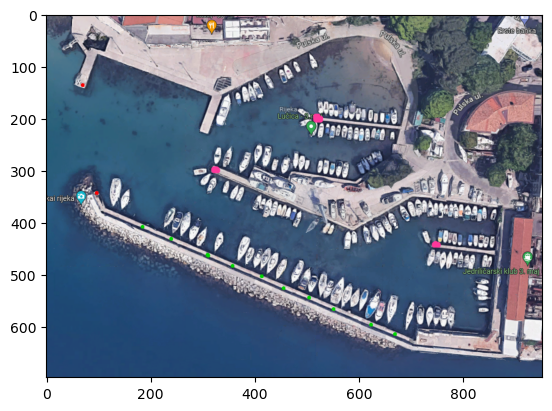

In [3]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("marina.png")
plt.imshow(image)
plt.show()

### Kamere i snimanje
- Legenda:  
  crveno - kamere na ulazu u marinu, u visini broda kako bi se mogao detektirati model broda te u najboljem slučaju i registracija.  
  zeleno - kamere koje bi bile poredane kroz cijelu dužinu marine tj. pored vezova primarno za detekciju tablica kako bi se moglo odrediti je li brod vezan na ispravan vez.  
  rozo - kamere na visini koje bi detektirale modele brodova te sveukupno stanje u marini. To bi vjerojatno bile širokokutne kamere kako bi mogle pokriti veći prostor, a bile bi raspoređene tako da svaka kamera ima presjek sa barem jednom drugom kamerom tako da kada je neki brod na izlazu iz kadra jedne kamere, također je na ulazu u kadar druge kamere kako ne bi imali područja u marini koja se ne vide.
  
- Za slučaj da je marina dobro osvjetljena, rezolucija kamera može biti manja no za slučaj da je marina po noći tamna, rezolucije crvenih i rozih kamera bi trebale biti veće, a pored zelenih kamera bi se moglo staviti osvjetljenje koje bi osvjetljavalo registracije plovila pa bi rezolucija mogla biti manja. Naravno, uz uvjet da nema ograničenja drugih resursa.

### Udaljenost

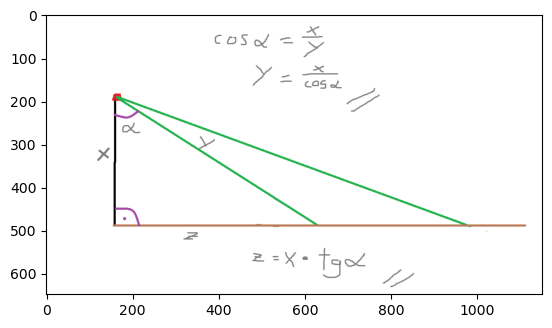

In [6]:
image = mpimg.imread("udaljenost.png")
plt.imshow(image)
plt.show()

- Nažalost gornja slika radi samo ako je objekt koji se želi izmjeriti na istoj visini kao i podnožje kamere no ako se želi izmjeriti udaljenost kamere od broda može se samo u x dodati visina iznad mora.
- Dimenzija se može izmjeriti tako da se naprave dva mjerenja duljine, jedno na početku objekta, drugo na kraju objekta te se izračuna razlika.